<a href="https://colab.research.google.com/github/ajitjadhav10/UMBC/blob/main/DATA%20602/Data_602_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#importing key libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

In [57]:
matplotlib.rcParams.update({'font.size': 12})

In [58]:
#Loading the Boston dataset from sklearn.datasets

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

#Loading the LinearRegression and Ridge libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge




In [59]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [60]:
#Using ‘Price’ as the target and drop ‘Price’ from the ‘newX’ variable. Check if ‘newX’ is properly coded.

boston_df['Price']=boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [61]:
newX=boston_df.drop('Price',axis=1)
print (newX[0:3]) # check 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  


In [62]:
newY=boston_df['Price']

In [63]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)

In [64]:
#Use ‘lr’ as the ‘LinearRegression()’ and ‘rr’ as the ‘Ridge()’ models. Set alpha at 0.01 and alpha at 100 for the Ridge model.

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)


Ridge(alpha=0.01)

In [66]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [67]:
#Computing the score for lr and rr model

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [68]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

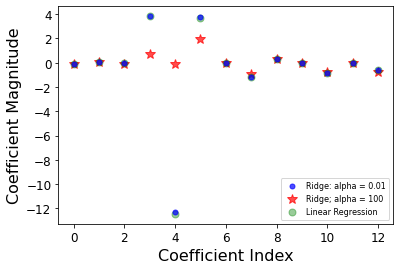

In [69]:
##Plotting the ‘Coefficient Magnitude’ as y and the ‘Coefficient Index’ as X on a graph. Show the results for alpha = 0.01 and alpha = 100, together with the Linear Regression model coefficients

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='.',markersize=10,color='blue',label=r'Ridge: alpha = 0.01',zorder=8)

plt.plot(rr100.coef_,alpha=0.7,linestyle='none',marker='*',markersize=10,color='red',label=r'Ridge; alpha = 100') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')


plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=8,loc=4)
plt.show()

For alpha value of 0.01, less restricted coefficients result in  coefficients of almost same magnitude as of linear regression. 

For alpha value of 100, we see that for coefficient index 3,4,5 the coefficient magnitudes are comparatively less than that of linear regression